In [1]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# read the dataset
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# get basic info of the data we have
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning

In [4]:
# Remove the non requried columns
leads_df = leads_df.drop(['Prospect ID', 'Lead Number'], axis=1)

In [5]:
# replacing "Select" with nan
leads_df = leads_df.replace(to_replace='Select', value=np.nan)

In [6]:
# Look into the various stats of numeric fields
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# finding null percentage in each column
def get_null_percentage():
    return round(100 * leads_df.isnull().sum()/leads_df.shape[0], 2)
null_counts = get_null_percentage()
null_counts

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [8]:
# finding columns to drop where null percenatge is more than 45
fields_to_drop = null_counts[null_counts > 45]
fields_to_drop

How did you hear about X Education    78.46
Lead Quality                          51.59
Lead Profile                          74.19
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

In [9]:
# droping cloumns with high null percentage
leads_df = leads_df.drop(fields_to_drop.index, axis=1)
leads_df.shape

(9240, 28)

In [10]:
# find list of categorical columns
cat_columns = leads_df.select_dtypes(['object']).columns
cat_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [11]:
# Find percenatge count of values in each column
def print_per_count():
    for col in cat_columns:
        print(f'**{col}**')
        print(round(leads_df[col].value_counts(normalize=True)*100,2))
        print()

print_per_count()

**Lead Origin**
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

**Lead Source**
Google               31.16
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
google                0.05
Click2call            0.04
Live Chat             0.02
Press_Release         0.02
Social Media          0.02
welearnblog_Home      0.01
blog                  0.01
Pay per Click Ads     0.01
youtubechannel        0.01
WeLearn               0.01
NC_EDM                0.01
testone               0.01
Name: Lead Source, dtype: float64

**Do Not Email**
No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64

**Do Not Call**
No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

**Last Act

In [12]:
# find highly skewed columns
def find_skewed_cols():
    skwed_cols = []
    for col in cat_columns:
        per_count = round(leads_df[col].value_counts(normalize=True)*100,2)
        if(per_count[0] >= 99):
            skwed_cols.append(col)
    return skwed_cols

skewed_cols = find_skewed_cols()
skewed_cols

['Do Not Call',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [13]:
# drop highly skewed columns
leads_df = leads_df.drop(skewed_cols, axis=1)
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [14]:
# function to replace all the values which have percentage count less than provided percentage with value 'Others'
def replace_with_other(col, per):
    temp = round(leads_df[col].value_counts(normalize=True)*100,2)
    temp = temp[temp < per]
    leads_df[col] = leads_df[col].apply(lambda x: 'Others' if x in temp.index else x)

In [15]:
replace_with_other('Lead Origin', 10)
replace_with_other('Lead Source', 10)
replace_with_other('Last Activity', 5)
replace_with_other('Country', 5)
replace_with_other('What is your current occupation', 5)
replace_with_other('Tags', 8)
replace_with_other('Last Notable Activity', 5)

In [16]:
get_null_percentage()

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            36.58
What is your current occupation           29.11
Tags                                      36.29
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [17]:
# stats of remaining numerical columns
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


### Outliers

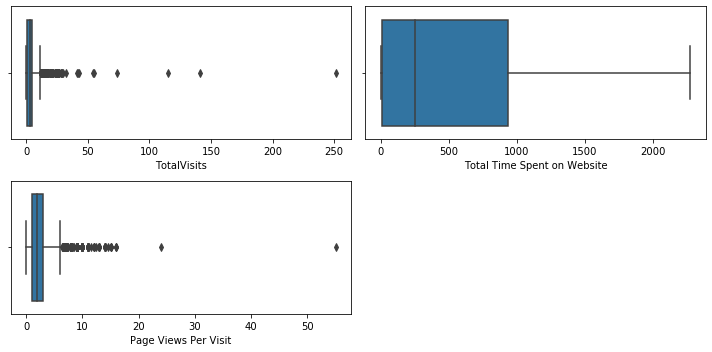

In [18]:
# check the outliers
plt.figure(figsize=(10,5))
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
i=1
for col in num_cols:
    plt.subplot(2,2,i)
    sns.boxplot(leads_df[col])
    i = i+1
plt.tight_layout()
plt.show()

**We are not treating the outliers because we that will impact the probabilties we will get with the Logistic Regression model**

### Imputation

In [19]:
# function to impute null values with the median
def impute_with_median(col):
    leads_df[col] = leads_df[col].fillna(leads_df[col].median())

In [20]:
# impute the numerical values
impute_with_median('TotalVisits')
impute_with_median('Total Time Spent on Website')
impute_with_median('Page Views Per Visit')

Leads source have very few null values so let's drop them

In [21]:
# Drop rows with Lead Source as null
eads_df = leads_df[~leads_df['Lead Source'].isnull()]

In [22]:
# receck the null percentage
get_null_percentage()

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              1.11
Country                                   26.63
Specialization                            36.58
What is your current occupation           29.11
Tags                                      36.29
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

- Dropping City and Country as country has more values for India and will make the model bias
- Similarly City is not providing any information clearly from Business Perspective

In [23]:
# Dropping city and country columns
leads_df = leads_df.drop(['City','Country'], axis=1)

In [24]:
leads_df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [25]:
# converting Yes to 1 and No to 0
leads_df['A free copy of Mastering The Interview'] = leads_df['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

## Dummy Variables (One Hot Encoding)

In [26]:
# get list of categotical columns
leads_df.select_dtypes(['object']).columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Last Notable Activity'],
      dtype='object')

In [27]:
# Creating dummy variables for the remaining categorical variables 
# and dropping the level which doesn't have much bussiness importance.

# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(leads_df['Lead Origin'], prefix='Lead Origin')
# Dropping Lead Origin_Others column
lo1 = lo.drop(['Lead Origin_Others'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df, lo1], axis=1)

# Creating dummy variables for the variable 'Lead Source'.
ls = pd.get_dummies(leads_df['Lead Source'], prefix='Lead Source')
ls1 = ls.drop(['Lead Source_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ls1], axis=1)

# Creating dummy variables for the variable 'Do Not Email'.
dne = pd.get_dummies(leads_df['Do Not Email'], prefix='Do Not Email')
dne1 = dne.drop(['Do Not Email_No'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,dne1], axis=1)

# Creating dummy variables for the variable 'Last Activity'. 
la = pd.get_dummies(leads_df['Last Activity'], prefix='Last Activity')
la1 = la.drop(['Last Activity_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,la1], axis=1)

# Creating dummy variables for the variable 'Specialization'.
sp =pd.get_dummies(leads_df['Specialization'], prefix='Specialization')
sp1 = sp.drop(['Specialization_Services Excellence'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,sp1], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'. 
oc = pd.get_dummies(leads_df['What is your current occupation'], prefix='Occupation')
oc1 = oc.drop(['Occupation_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,oc1], axis=1)

# Creating dummy variables for the variable 'Tags'.
tg =pd.get_dummies(leads_df['Tags'], prefix='Tags')
tg1 = tg.drop(['Tags_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,tg1], axis=1)

# Creating dummy variables for the variable 'Last Notable Activity'.
lna =pd.get_dummies(leads_df['Last Notable Activity'], prefix='Last Notable Activity')
lna1 = lna.drop(['Last Notable Activity_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,lna1], axis=1)

In [28]:
# list of original columns
cols_to_drop1 = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','Specialization', 'What is your current occupation', 'Tags',
       'Last Notable Activity']

In [29]:
#Drop orignal columns
leads_df = leads_df.drop(cols_to_drop1, axis = 1)
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 41 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Converted                                         9240 non-null   int64  
 1   TotalVisits                                       9240 non-null   float64
 2   Total Time Spent on Website                       9240 non-null   int64  
 3   Page Views Per Visit                              9240 non-null   float64
 4   A free copy of Mastering The Interview            9240 non-null   int64  
 5   Lead Origin_API                                   9240 non-null   uint8  
 6   Lead Origin_Landing Page Submission               9240 non-null   uint8  
 7   Lead Source_Direct Traffic                        9240 non-null   uint8  
 8   Lead Source_Google                                9240 non-null   uint8  
 9   Lead Source_Olark C

## Test-Train Split

In [30]:
# importing required library
from sklearn.model_selection import train_test_split

In [31]:
# Putting features to X
X = leads_df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Unemployed,Occupation_Working Professional,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,5.0,674,2.5,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,2.0,1532,2.0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1.0,305,1.0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,2.0,1428,1.0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [32]:
#Putting target to y
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [33]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

## Feature Scaling

In [34]:
# importing Standard Scaler
from sklearn.preprocessing import StandardScaler

In [35]:
# scaling the numerical columns
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].head()

<ipython-input-35-33aa86bfd48f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
4715,-0.683382,-0.887525,-1.085013
7132,-0.291250,1.386983,-0.626464
8954,0.100883,-0.182209,-0.475143
5283,13.825518,1.315905,4.568896
3003,-0.095184,1.580170,0.290634


In [36]:
# checking conversion rate
round(100 * sum(leads_df['Converted'])/leads_df.shape[0],2)

38.54

We have almost 38% conversion rate

### Looking at Correlations

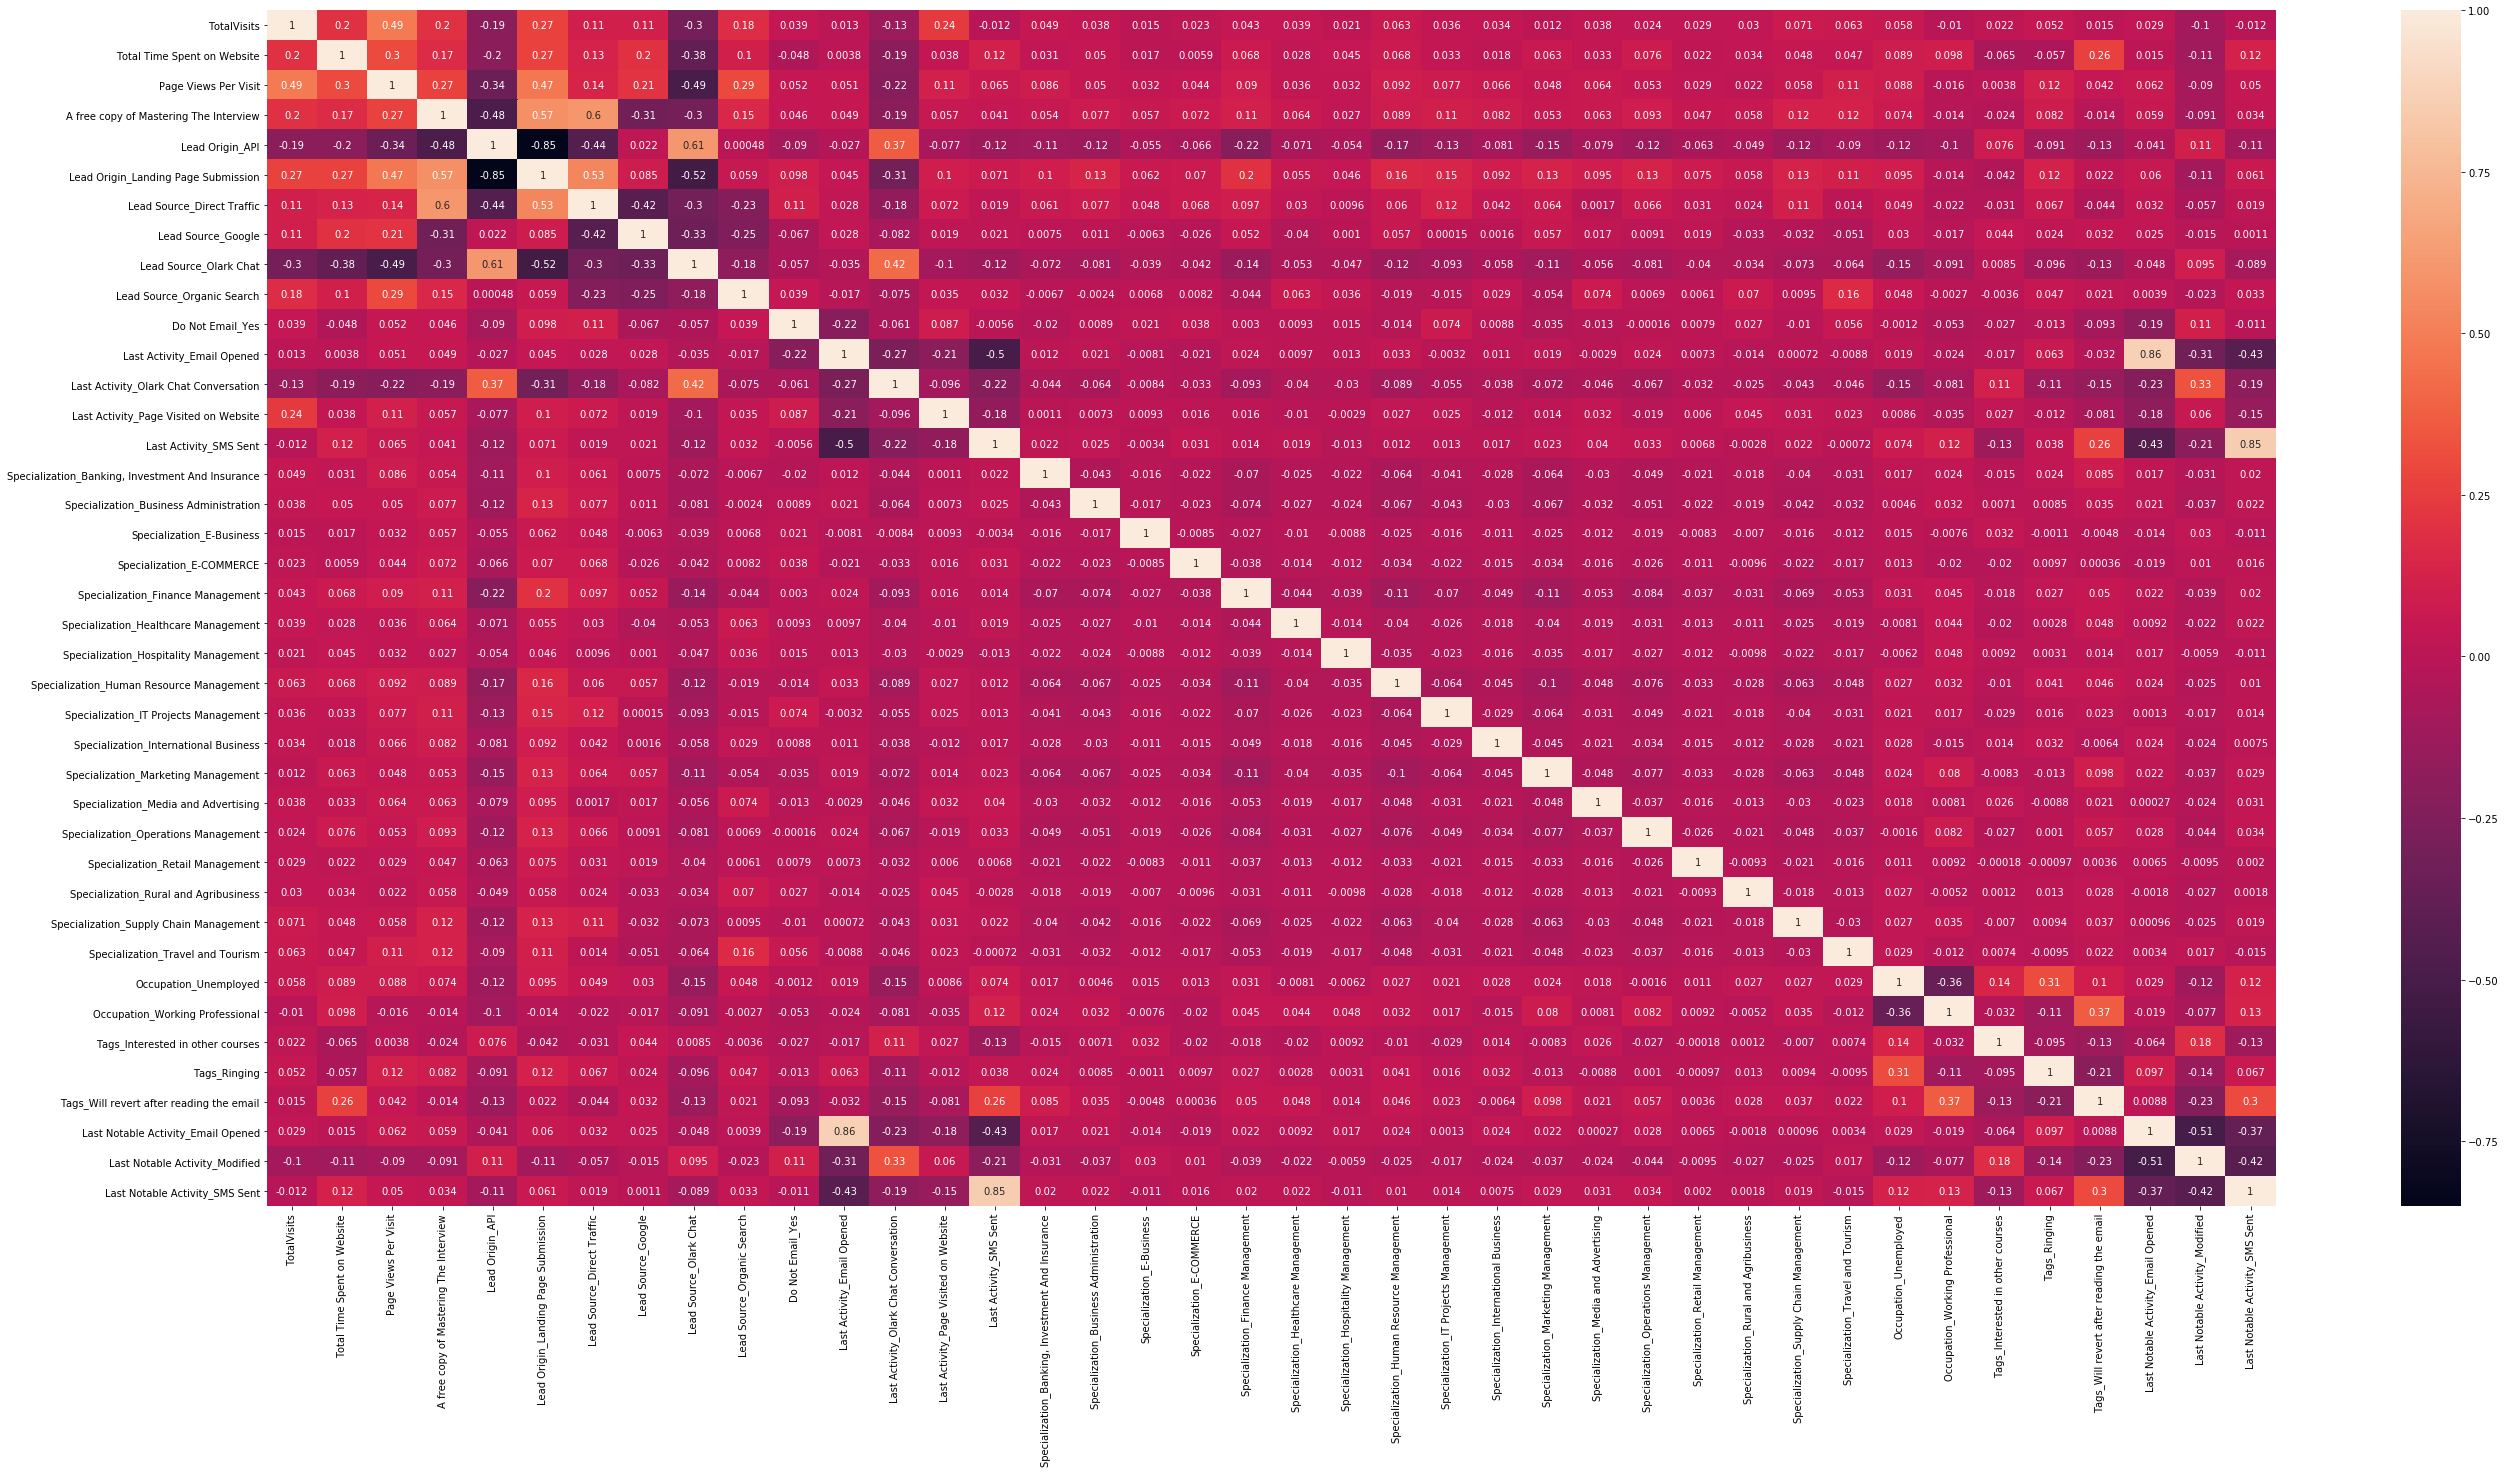

In [37]:
plt.figure(figsize=(45,22))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

Let's drop the highly correlated columns.
- Lead Origin_API
- Last Activity_SMS Sent
- Last Activity_Olark Chat Conversation

In [38]:
# Dropping the highly correlated columns
cols_to_drop = ['Lead Origin_API', 'Last Activity_SMS Sent', 'Last Activity_Olark Chat Conversation']
X_test = X_test.drop(cols_to_drop, axis = 1)
X_train = X_train.drop(cols_to_drop, axis=1)

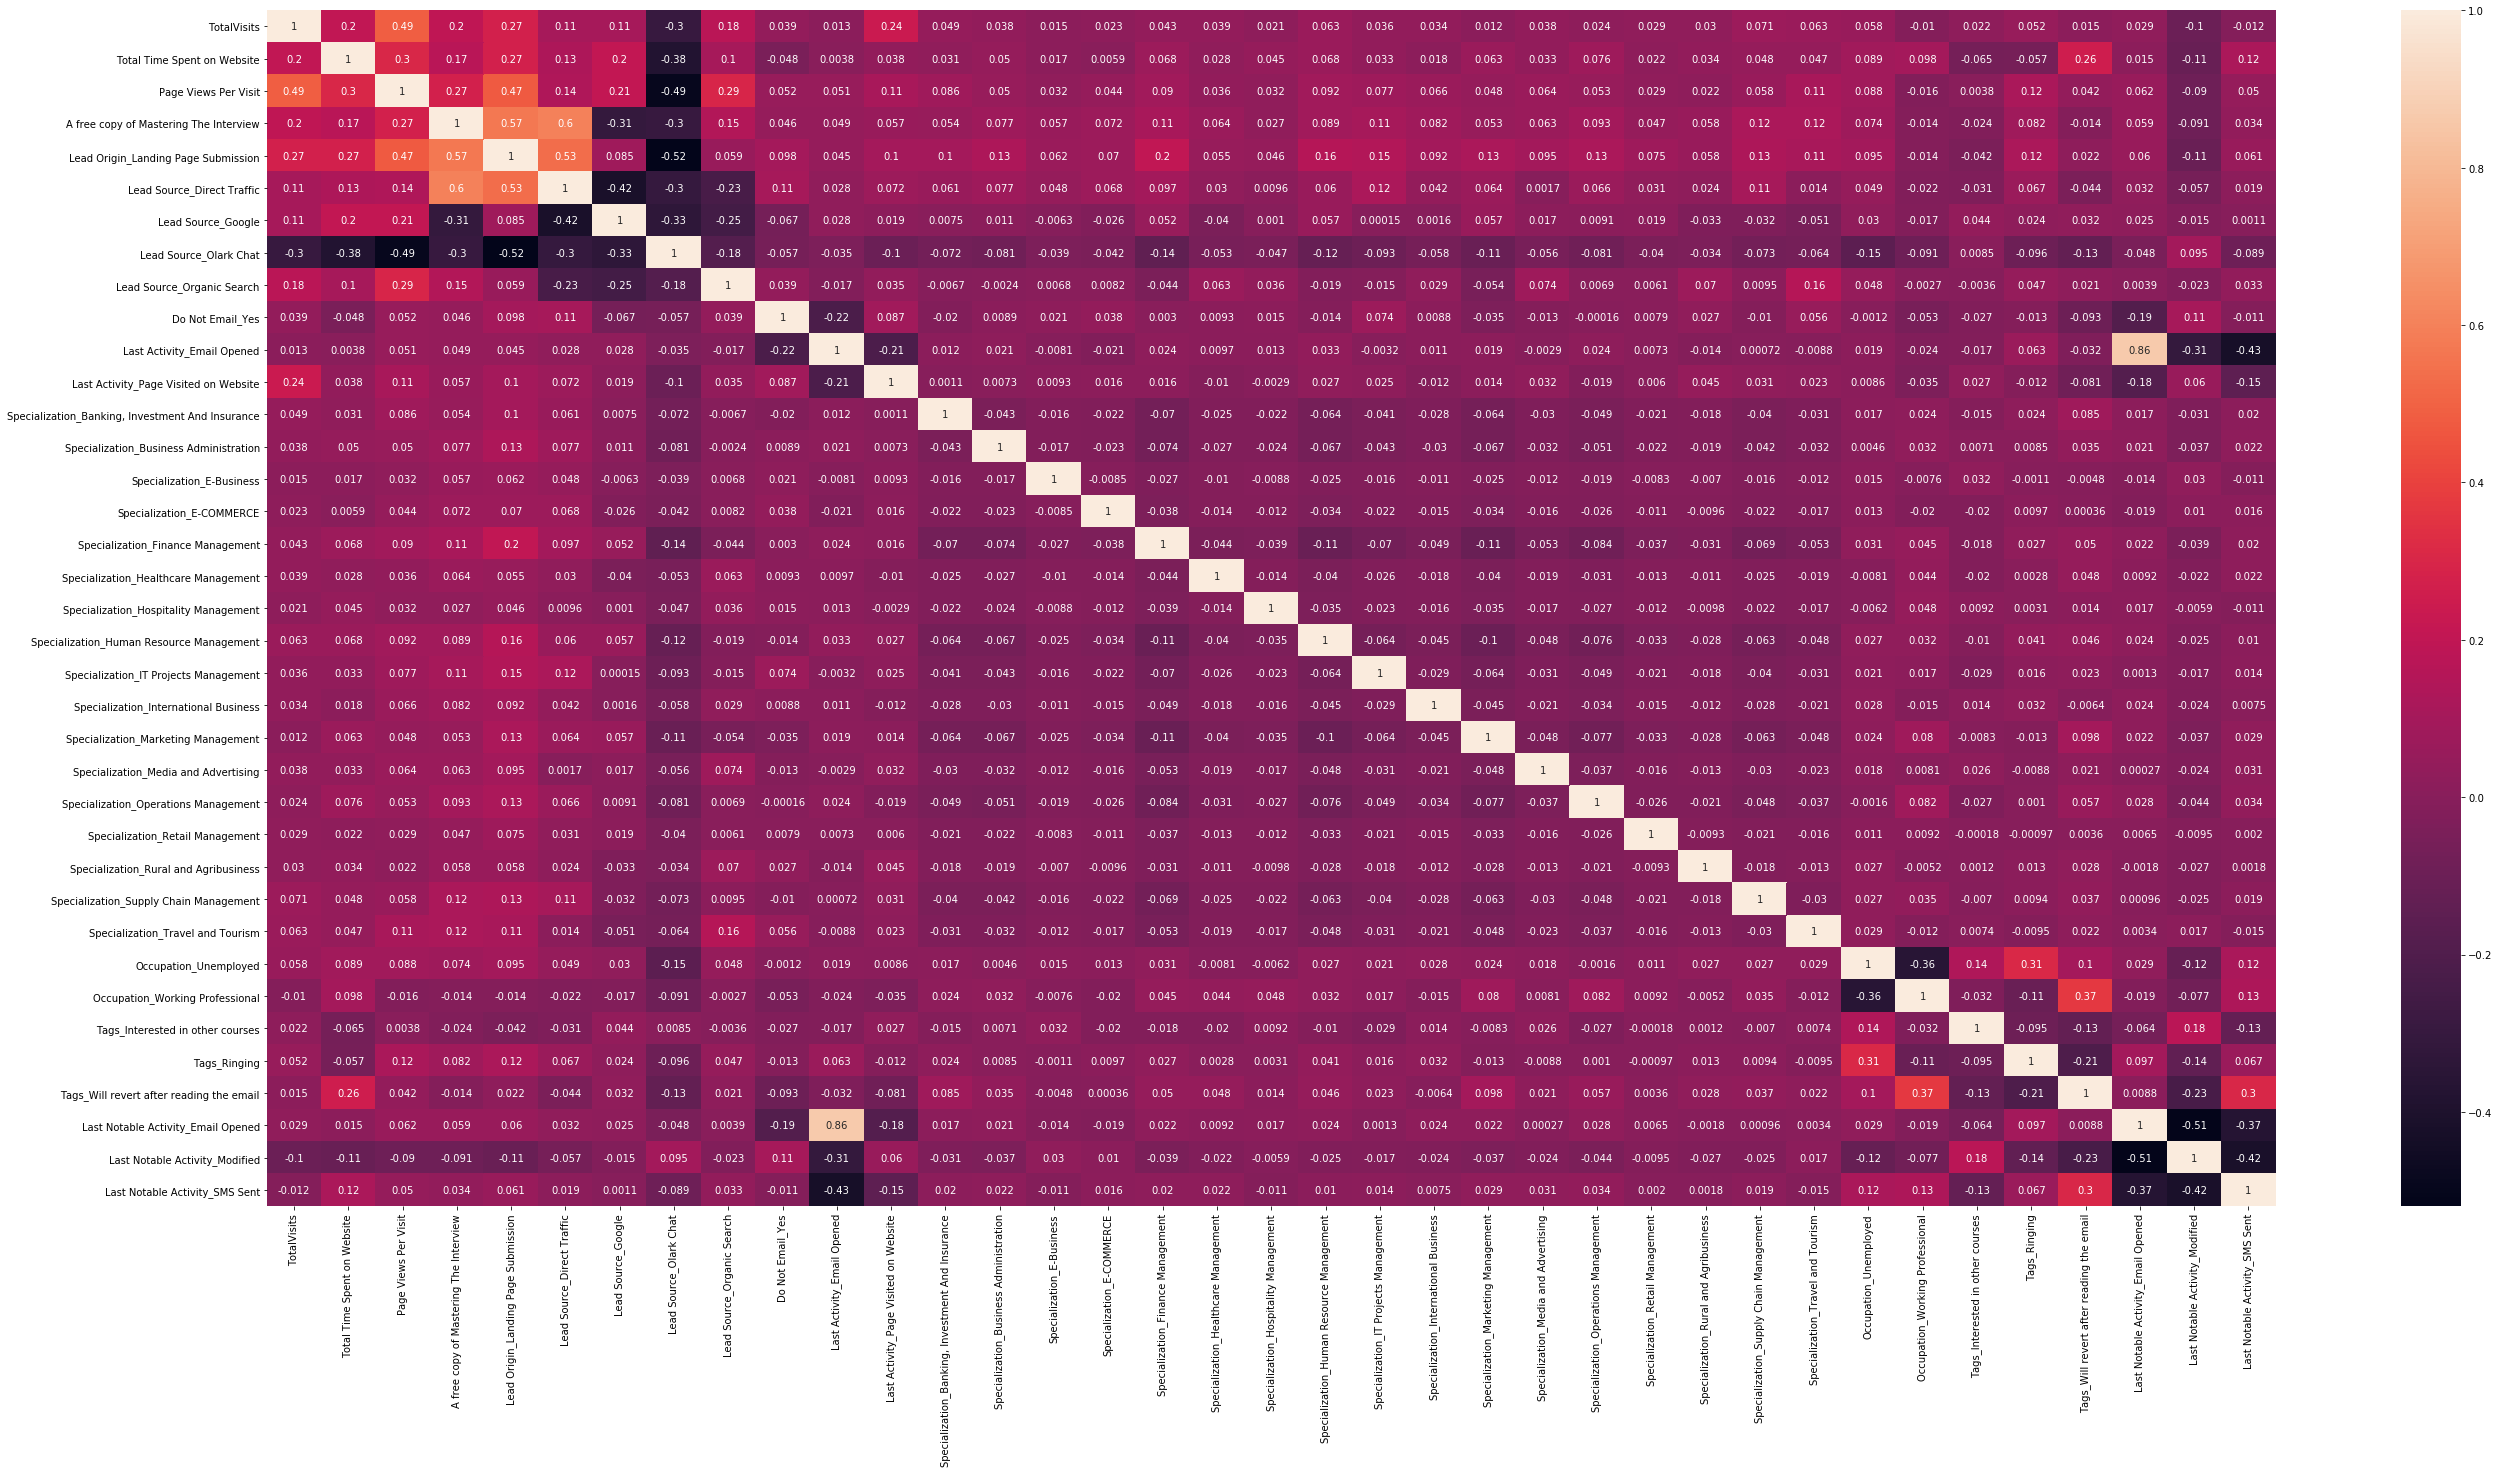

In [39]:
plt.figure(figsize=(45,22))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

## Model Building

In [40]:
# importing statsmodel
import statsmodels.api as sm

In [41]:
# building the model with all of the features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1772.9
Date:                Mon, 20 Apr 2020   Deviance:                       3545.7
Time:                        14:05:37   Pearson chi2:                 9.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.2560      0.231     -1.108      0.268      -0.709       0.197
TotalVisits                                          0.2205      0.061      3.603      0.000       0.101       0.340
Total Time Spent on Website                          1.0030      0.050     19.884      0.000       0.904       1.102
Page Views Per Visit                                -0.2756      0.070     -3.911      0.000      -0.414      -0.138
A free copy of Mastering The Interview               0.0253      0.139      0.183      0.855      -0.246       0.297
Lead Origin_Landing Page Submission                 -0.5156      0.175     -2.954      0.003      -0.858      -0.173
Lead Source_Direct Traffic                          -2.3388      0.215    -10.881      0.000      -2.760      -1.918
Lead Source_Google                                  -1.9844      0.183    -10.819      0.000      -2.344      -1.625
Lead Source_Olark Chat                              -1.5219      0.175     -8.711      0.000      -1.864      -1.180
Lead Source_Organic Search                          -2.1281      0.218     -9.741      0.000      -2.556      -1.700
Do Not Email_Yes                                    -1.3008      0.206     -6.324      0.000      -1.704      -0.898
Last Activity_Email Opened                           0.8503      0.167      5.092      0.000       0.523       1.178
Last Activity_Page Visited on Website                0.0800      0.197      0.407      0.684      -0.306       0.466
Specialization_Banking, Investment And Insurance     0.7480      0.288      2.596      0.009       0.183       1.313
Specialization_Business Administration               0.6393      0.257      2.485      0.013       0.135       1.144
Specialization_E-Business                            0.2735      0.543      0.504      0.614      -0.791       1.338
Specialization_E-COMMERCE                            0.7574      0.415      1.826      0.068      -0.055       1.570
Specialization_Finance Management                    0.4523      0.204      2.222      0.026       0.053       0.851
Specialization_Healthcare Management                 0.5029      0.392      1.282      0.200      -0.266       1.272
Specialization_Hospitality Management               -0.3619      0.439     -0.825      0.410      -1.222       0.498
Specialization_Human Resource Management             0.2824      0.209      1.348      0.178      -0.128       0.693
Specialization_IT Projects Management                0.3201      0.281      1.141      0.254      -0.230       0.870
Specialization_International Business                0.1258      0.357      0.352      0.725      -0.575       0.826
Specialization_Marketing Management      

## Feature Selection Using RFE

In [42]:
# import and create instance of LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [43]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)             # running RFE with 12 variables as output
rfe = rfe.fit(X_train, y_train)

In [44]:
rfe.support_

array([False,  True, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
        True])

In [45]:
#check RFE ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('A free copy of Mastering The Interview', False, 25),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Page Visited on Website', False, 24),
 ('Specialization_Banking, Investment And Insurance', False, 7),
 ('Specialization_Business Administration', False, 9),
 ('Specialization_E-Business', False, 20),
 ('Specialization_E-COMMERCE', False, 6),
 ('Specialization_Finance Management', False, 12),
 ('Specialization_Healthcare Management', False, 10),
 ('Specialization_Hospitality Management', False, 2),
 ('Specialization_Human Resource Management', False, 18),
 ('Specialization_IT Projects Management', False, 17),
 ('Specialization_I

In [46]:
# list of remaining columns
col = X_train.columns[rfe.support_]

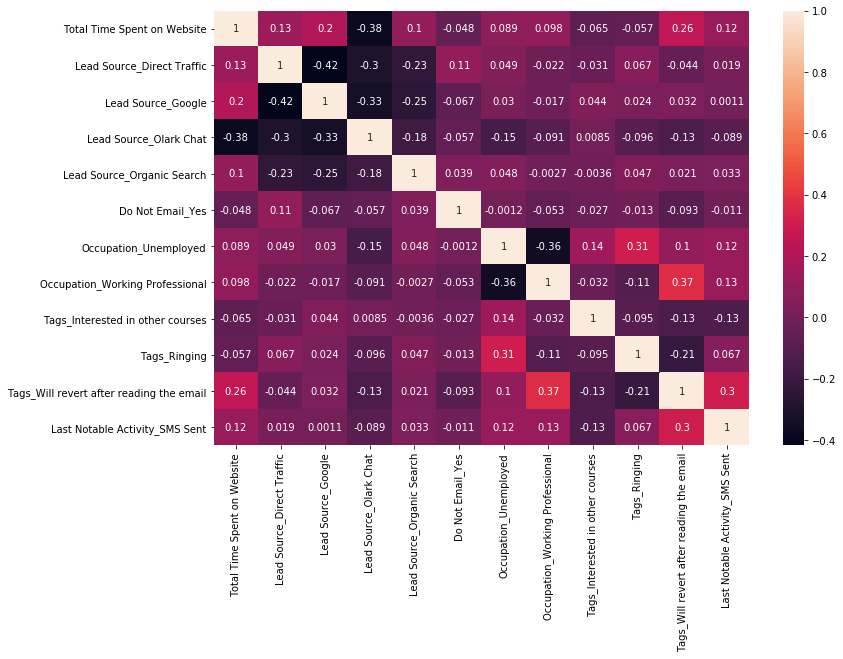

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train.loc[:,col].corr(), annot=True)
plt.show()

In [48]:
# columns removed after RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Last Activity_Email Opened',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
     

##### Assessing the model with StatsModels

In [49]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1821.0
Date:                Mon, 20 Apr 2020   Deviance:                       3642.0
Time:                        14:05:40   Pearson chi2:                 8.98e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0609      0.156     -0.389      0.697      -0.368       0.246
Total Time Spent on Website                  0.9928      0.049     20.120      0.000       0.896       1.090
Lead Source_Direct Traffic                  -2.5551      0.168    -15.167      0.000      -2.885      -2.225
Lead Source_Google                          -2.1837      0.165    -13.198      0.000      -2.508      -1.859
Lead Source_Olark Chat                      -1.4837      0.167     -8.864      0.000      -1.812      -1.156
Lead Source_Organic Search                  -2.4504      0.195    -12.560      0.000      -2.833      -2.068
Do Not Email_Yes                            -1.4523      0.195     -7.467      0.000      -1.834      -1.071
Occupation_Unemployed                        1.2540      0.094     13.297      0.000       1.069       1.439
Occupation_Working Professional              2.5583      0.253     10.092      0.000       2.061       3.055
Tags_Interested in other courses            -3.2902      0.371     -8.859      0.000      -4.018      -2.562
Tags_Ringing                                -3.7188      0.229    -16.241      0.000      -4.168      -3.270
Tags_Will revert after reading the email     3.4957      0.168     20.859      0.000       3.167       3.824
Last Notable Activity_SMS Sent               1.9918      0.108     18.430      0.000       1.780       2.204
============================================================================================================
"""

In [50]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

4715    0.081231
7132    0.973799
8954    0.036616
5283    0.181249
3003    0.259747
          ...   
5734    0.004701
5191    0.081231
5390    0.996980
860     0.005135
7270    0.802419
Length: 6468, dtype: float64

In [51]:
# reshapng the data
y_train_pred = y_train_pred.values.reshape(-1)

In [52]:
y_train_pred[:10]

array([0.08123121, 0.97379942, 0.03661609, 0.18124862, 0.2597469 ,
       0.08123121, 0.97812251, 0.99382169, 0.00694585, 0.23654867])

##### Creating a dataframe with the actual Converted and the predicted probabilities

In [53]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

In [54]:
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.081231,4715
1,1,0.973799,7132
2,0,0.036616,8954
3,0,0.181249,5283
4,0,0.259747,3003


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [55]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted
0,0,0.081231,4715,0
1,1,0.973799,7132,1
2,0,0.036616,8954,0
3,0,0.181249,5283,0
4,0,0.259747,3003,0


In [56]:
from sklearn import metrics

In [57]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3699  285]
 [ 476 2008]]


In [58]:
# Predicted     not_converted    converted
# Actual
# not_churn        3758      207
# churn            434       2043  

In [59]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8823438466295609


#### Checking VIFs

In [60]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Occupation_Unemployed,3.35
10,Tags_Will revert after reading the email,2.03
2,Lead Source_Google,1.63
1,Lead Source_Direct Traffic,1.62
7,Occupation_Working Professional,1.49
9,Tags_Ringing,1.48
11,Last Notable Activity_SMS Sent,1.48
3,Lead Source_Olark Chat,1.32
4,Lead Source_Organic Search,1.29
0,Total Time Spent on Website,1.28


### Drop Occupation_Working Professional because of high correlation with other fields

In [62]:
# Let's drop Occupation_Unemployed since it has a high VIF
col = col.drop('Occupation_Working Professional')
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Do Not Email_Yes',
       'Occupation_Unemployed', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [63]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1882.0
Date:                Mon, 20 Apr 2020   Deviance:                       3763.9
Time:                        14:05:41   Pearson chi2:                 8.56e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.5051      0.145      3.486      0.000       0.221       0.789
Total Time Spent on Website                  0.9852      0.048     20.350      0.000       0.890       1.080
Lead Source_Direct Traffic                  -2.8456      0.165    -17.231      0.000      -3.169      -2.522
Lead Source_Google                          -2.4869      0.161    -15.440      0.000      -2.803      -2.171
Lead Source_Olark Chat                      -1.8785      0.161    -11.639      0.000      -2.195      -1.562
Lead Source_Organic Search                  -2.7351      0.191    -14.335      0.000      -3.109      -2.361
Do Not Email_Yes                            -1.4415      0.193     -7.465      0.000      -1.820      -1.063
Occupation_Unemployed                        0.9424      0.087     10.817      0.000       0.772       1.113
Tags_Interested in other courses            -3.1776      0.374     -8.496      0.000      -3.911      -2.445
Tags_Ringing                                -3.6617      0.228    -16.040      0.000      -4.109      -3.214
Tags_Will revert after reading the email     3.9304      0.165     23.869      0.000       3.608       4.253
Last Notable Activity_SMS Sent               1.9322      0.106     18.159      0.000       1.724       2.141
============================================================================================================
"""

In [64]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [65]:
y_train_pred[:10]

array([0.09553856, 0.98217611, 0.03532714, 0.17606718, 0.31349534,
       0.09553856, 0.98502055, 0.95990566, 0.0070168 , 0.21325811])

In [66]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [67]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted
0,0,0.095539,4715,0
1,1,0.982176,7132,1
2,0,0.035327,8954,0
3,0,0.176067,5283,0
4,0,0.313495,3003,0


In [68]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8735312306740878


#### The accuracy is almost the same.

### Let's now check the VIFs again

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Occupation_Unemployed,2.82
9,Tags_Will revert after reading the email,1.60
2,Lead Source_Google,1.58
1,Lead Source_Direct Traffic,1.56
10,Last Notable Activity_SMS Sent,1.46
8,Tags_Ringing,1.45
3,Lead Source_Olark Chat,1.31
0,Total Time Spent on Website,1.28
4,Lead Source_Organic Search,1.27
7,Tags_Interested in other courses,1.17


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [70]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3695,  289],
       [ 529, 1955]], dtype=int64)

In [71]:
# Actual/Predicted     not_converted    converted
        # not_churn        3703      262
        # churn            471       2006  

In [72]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8735312306740878

In [73]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [74]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7870370370370371

In [75]:
# Let us calculate specificity
TN / float(TN+FP)

0.9274598393574297

In [76]:
# Calculate false postive rate - predicting converted when students are not converted into lead
print(FP/ float(TN+FP))

0.07254016064257028


In [77]:
# positive predictive value 
print (TP / float(TP+FP))

0.8712121212121212


In [78]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8747632575757576


### Drop Lead Source_Google because of high correlation with other fields

In [79]:
# Let's drop Occupation_Unemployed since it has a high VIF
col = col.drop('Lead Source_Google')
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Do Not Email_Yes', 'Occupation_Unemployed',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [80]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2014.4
Date:                Mon, 20 Apr 2020   Deviance:                       4028.7
Time:                        14:05:43   Pearson chi2:                 7.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3691      0.080    -17.040      0.000      -1.527      -1.212
Total Time Spent on Website                  0.8114      0.044     18.301      0.000       0.725       0.898
Lead Source_Direct Traffic                  -0.9190      0.102     -8.983      0.000      -1.119      -0.718
Lead Source_Olark Chat                      -0.1490      0.116     -1.290      0.197      -0.375       0.077
Lead Source_Organic Search                  -0.8003      0.138     -5.798      0.000      -1.071      -0.530
Do Not Email_Yes                            -1.3441      0.181     -7.427      0.000      -1.699      -0.989
Occupation_Unemployed                        0.9938      0.084     11.857      0.000       0.830       1.158
Tags_Interested in other courses            -3.1069      0.356     -8.724      0.000      -3.805      -2.409
Tags_Ringing                                -3.6957      0.226    -16.350      0.000      -4.139      -3.253
Tags_Will revert after reading the email     3.9888      0.162     24.559      0.000       3.670       4.307
Last Notable Activity_SMS Sent               1.8436      0.103     17.882      0.000       1.642       2.046
============================================================================================================
"""

In [81]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [82]:
y_train_pred[:10]

array([0.09636665, 0.98089857, 0.03577118, 0.17214041, 0.26779318,
       0.09636665, 0.982987  , 0.96299509, 0.01368082, 0.22366019])

In [83]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [84]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted
0,0,0.096367,4715,0
1,1,0.980899,7132,1
2,0,0.035771,8954,0
3,0,0.172140,5283,0
4,0,0.267793,3003,0


In [85]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8662646876932591


### Let's now check the VIFs again

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Occupation_Unemployed,2.39
8,Tags_Will revert after reading the email,1.58
9,Last Notable Activity_SMS Sent,1.45
7,Tags_Ringing,1.44
1,Lead Source_Direct Traffic,1.36
2,Lead Source_Olark Chat,1.28
0,Total Time Spent on Website,1.25
3,Lead Source_Organic Search,1.17
6,Tags_Interested in other courses,1.15
4,Do Not Email_Yes,1.10


In [87]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3716,  268],
       [ 597, 1887]], dtype=int64)

In [88]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8662646876932591

In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7596618357487923

In [91]:
# Let us calculate specificity
TN / float(TN+FP)

0.9327309236947792

In [92]:
# Calculate false postive rate - predicting converted when students are not converted into lead
print(FP/ float(TN+FP))

0.06726907630522089


In [93]:
# positive predictive value 
print (TP / float(TP+FP))

0.8756380510440835


In [94]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8615812659401808


### Drop Lead Source_Olark Chat because of high correlation with other fields

In [95]:
# Let's drop Occupation_Unemployed since it has a high VIF
col = col.drop('Lead Source_Olark Chat')
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Organic Search', 'Do Not Email_Yes',
       'Occupation_Unemployed', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [96]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2015.2
Date:                Mon, 20 Apr 2020   Deviance:                       4030.4
Time:                        14:05:45   Pearson chi2:                 7.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4207      0.070    -20.271      0.000      -1.558      -1.283
Total Time Spent on Website                  0.8316      0.042     19.986      0.000       0.750       0.913
Lead Source_Direct Traffic                  -0.8834      0.099     -8.938      0.000      -1.077      -0.690
Lead Source_Organic Search                  -0.7659      0.136     -5.639      0.000      -1.032      -0.500
Do Not Email_Yes                            -1.3356      0.181     -7.381      0.000      -1.690      -0.981
Occupation_Unemployed                        1.0018      0.084     11.987      0.000       0.838       1.166
Tags_Interested in other courses            -3.1007      0.356     -8.705      0.000      -3.799      -2.403
Tags_Ringing                                -3.6890      0.226    -16.315      0.000      -4.132      -3.246
Tags_Will revert after reading the email     4.0046      0.162     24.701      0.000       3.687       4.322
Last Notable Activity_SMS Sent               1.8451      0.103     17.900      0.000       1.643       2.047
============================================================================================================
"""

In [97]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [98]:
y_train_pred[:10]

array([0.10351416, 0.98153515, 0.03564922, 0.1760228 , 0.2709043 ,
       0.10351416, 0.98366923, 0.96278216, 0.01312557, 0.23922583])

In [99]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [100]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted
0,0,0.103514,4715,0
1,1,0.981535,7132,1
2,0,0.035649,8954,0
3,0,0.176023,5283,0
4,0,0.270904,3003,0


In [101]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8658008658008658


### Let's now check the VIFs again

In [102]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Occupation_Unemployed,2.26
7,Tags_Will revert after reading the email,1.58
8,Last Notable Activity_SMS Sent,1.44
6,Tags_Ringing,1.43
1,Lead Source_Direct Traffic,1.35
2,Lead Source_Organic Search,1.16
5,Tags_Interested in other courses,1.15
3,Do Not Email_Yes,1.10
0,Total Time Spent on Website,1.09


In [103]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3715,  269],
       [ 599, 1885]], dtype=int64)

In [104]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8658008658008658

In [105]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7588566827697263

In [107]:
# Let us calculate specificity
TN / float(TN+FP)

0.9324799196787149

In [108]:
# Calculate false postive rate - predicting converted when students are not converted into lead
print(FP/ float(TN+FP))

0.06752008032128515


In [109]:
# positive predictive value 
print (TP / float(TP+FP))

0.8751160631383472


In [110]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8611497450162262


### Step 9: Plotting the ROC Curve
### An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [111]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [112]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

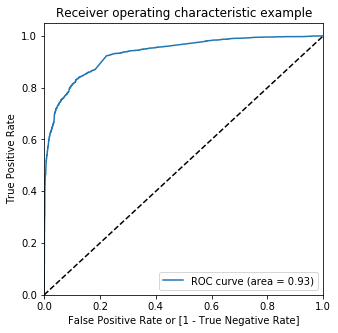

In [113]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [114]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.103514,4715,0,1,1,0,0,0,0,0,0,0,0
1,1,0.981535,7132,1,1,1,1,1,1,1,1,1,1,1
2,0,0.035649,8954,0,1,0,0,0,0,0,0,0,0,0
3,0,0.176023,5283,0,1,1,0,0,0,0,0,0,0,0
4,0,0.270904,3003,0,1,1,1,0,0,0,0,0,0,0


In [115]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.639920  0.977858  0.429217
0.2   0.2  0.821274  0.930354  0.753263
0.3   0.3  0.858380  0.844203  0.867219
0.4   0.4  0.866110  0.805153  0.904116
0.5   0.5  0.865801  0.758857  0.932480
0.6   0.6  0.865492  0.721417  0.955321
0.7   0.7  0.848794  0.657005  0.968373
0.8   0.8  0.840291  0.616747  0.979669
0.9   0.9  0.820037  0.548712  0.989207


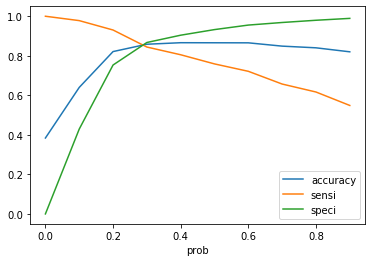

In [116]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [117]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.103514,4715,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.981535,7132,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.035649,8954,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.176023,5283,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.270904,3003,0,1,1,1,0,0,0,0,0,0,0,0


In [118]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8583797155225726

In [119]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[3455,  529],
       [ 387, 2097]], dtype=int64)

In [120]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8442028985507246

In [122]:
# Let us calculate specificity
TN / float(TN+FP)

0.867218875502008

In [123]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.13278112449799198


In [124]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7985529322162985


In [125]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8992712129099427


### Precision and Recall

Looking at the confusion matrix again

In [126]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3715,  269],
       [ 599, 1885]], dtype=int64)

##### Precision
TP / TP + FP

In [127]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8751160631383472

##### Recall
TP / TP + FN

In [128]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7588566827697263

### Using sklearn utilities for the same

In [129]:
from sklearn.metrics import precision_score, recall_score

In [130]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8751160631383472

In [131]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7588566827697263

### Precision and recall tradeoff

In [132]:
from sklearn.metrics import precision_recall_curve

In [133]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6463    0
 6464    0
 6465    1
 6466    0
 6467    1
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6463    0
 6464    0
 6465    1
 6466    0
 6467    1
 Name: Predicted, Length: 6468, dtype: int64)

In [134]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

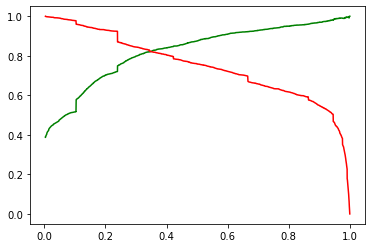

In [135]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [136]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [137]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Organic Search,Do Not Email_Yes,Occupation_Unemployed,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
4608,-0.428249,0,0,0,1,0,0,0,0
7935,0.805598,1,0,1,0,0,0,0,0
4043,-0.883879,1,0,1,0,0,0,0,0
7821,-0.298850,1,0,0,0,0,1,0,0
856,-0.521198,0,0,0,0,0,0,0,0


In [138]:
X_test_sm = sm.add_constant(X_test)

### Making predictions on the test set

In [139]:
y_test_pred = res.predict(X_test_sm)

In [140]:
y_test_pred[:10]

4608    0.315401
7935    0.048811
4043    0.012435
7821    0.001943
856     0.135389
927     0.361500
318     0.984840
1018    0.153366
8151    0.460352
1570    0.863635
dtype: float64

In [141]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [142]:
# Let's see the head
y_pred_1.head()

,0
4608,0.315401
7935,0.048811
4043,0.012435
7821,0.001943
856,0.135389


In [143]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [144]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [145]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [146]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [147]:
y_pred_final.head()

,Converted,LeadID,0
0,1,4608,0.315401
1,0,7935,0.048811
2,0,4043,0.012435
3,0,7821,0.001943
4,0,856,0.135389


In [148]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [149]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Converted_Prob'], axis=1)

In [150]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Converted_Prob
0,4608,1,0.315401
1,7935,0,0.048811
2,4043,0,0.012435
3,7821,0,0.001943
4,856,0,0.135389


In [151]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [152]:
y_pred_final.head()

,LeadID,Converted,Converted_Prob,Final_Predicted
0,4608,1,0.315401,0
1,7935,0,0.048811,0
2,4043,0,0.012435,0
3,7821,0,0.001943,0
4,856,0,0.135389,0


In [153]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.8658008658008658